In [86]:
# Time Series forecasting with ARIMA

import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 1: Read the Data

In [56]:
df = pd.read_csv(r"C:\Users\joshj\AppData\Local\Programs\Python\Python310\trend.csv", parse_dates = ["Date"], index_col=["Date"])

In [57]:
df.head()

,sales
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Step 2: Resample the Data

Aggregation of data


Daily -> Monthly


Monthly -> Annually

In [58]:
ts = df["sales"].resample("MS").sum()

In [45]:
ts.head()

Date
2014-01-01     9812
2014-02-01    18620
2014-03-01    29760
2014-04-01    37950
2014-05-01    48670
Freq: MS, Name: sales, dtype: int64

<Axes: xlabel='Date'>

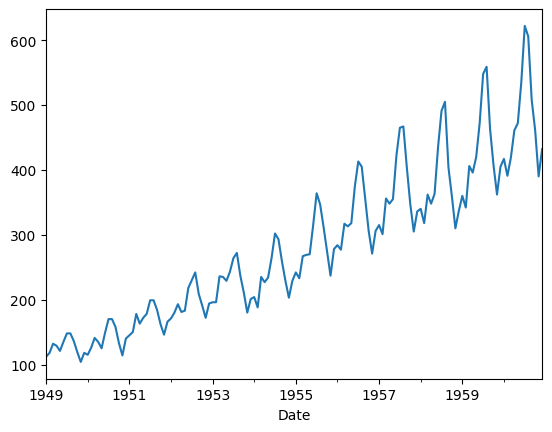

In [59]:
ts.plot()

# Step 3: Stationarity Check

In [60]:
import statsmodels.api as sm

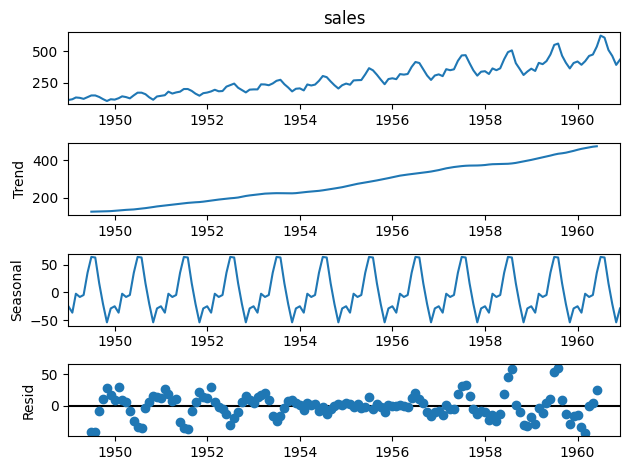

In [61]:
decomposition = sm.tsa.seasonal_decompose(ts, model="additive")
fig = decomposition.plot()
plt.show()
# this data is seasonal and requires SARIMA (Seasonal ARIMA)

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
adftest=adfuller(ts)

In [69]:
print("pvalue of adfuller test is: ", adftest[1])

pvalue of adfuller test is:  0.9918802434376409


# Step4: Train test split

In [65]:
len(ts)

144

In [70]:
train=ts[:64] # takes 0 month to 63rd month
test=ts[64:] # takes 63rd month to last month 



# ARIMA Model Building:

    1. AR:
        
    2. MA:
        
    3. Integrated:
        
 For building ARIMA we need the 
 
 AR order p
 
 MA order q
        
 Integrated order d
 

# Step 5: Hyperparamaters of ARIMA model - p d q

In [72]:
# p = 5, d = 0, q = 4

In [95]:
### How to get PDQ, 3 different methods discussed below

1. method ACF PACF plots

2. AUTO_ARIMA function

3. for loop

In [98]:
import itertools

In [99]:
p=range(0,8)
d=range(0,2)
q=range(0,8)

In [100]:
pdq_combination=list(itertools.product(p,d,q))

In [101]:
len(pdq_combination)

128

In [118]:
rmse = []

order1 = []

In [119]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train, order=pdq).fit()
        pred=model.predict(start=len(train), end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
        
    except:
        continue

In [120]:
results = pd.DataFrame(index=order1, data=rmse, columns=["RMSE"])

In [122]:
results.to_csv(r"C:\Users\joshj\AppData\Local\Programs\Python\Python310\ARIMA_result.csv")

# Step 6: Build ARIMA model


In [77]:
from statsmodels.tsa.arima.model import ARIMA

In [123]:
model=ARIMA(train, order=(6,1,6)).fit()

# Step 7: Predict test dataset

In [124]:
import warnings
warnings.filterwarnings("ignore")

In [125]:
pred=model.predict(start=len(train), end=(len(ts)-1))

# Step 8: Model Evaluation

In [126]:
from sklearn.metrics import mean_squared_error

In [133]:
error=np.sqrt(mean_squared_error(test, pred))

In [134]:
error

156.0612536259464

In [129]:
test.mean(), np.sqrt(test.var())

(365.0875, 90.9223056491473)

<Axes: xlabel='Date'>

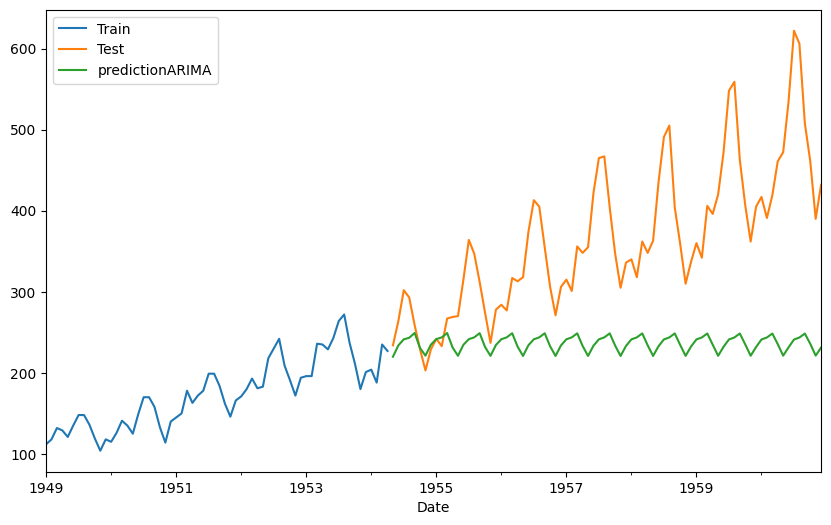

In [130]:
train.plot(legend=True, label="Train", figsize=(10,6))
test.plot(legend=True, label="Test")
pred.plot(legend=True, label="predictionARIMA")